# Analysis of Sydney top performing schools

Objectives:

- Using selenium to scrap data of 2022 sydney top performing primary and secondary school, 2022 NAPLAN Year 5 and Year 9 average scores, ICSEA index and the geographic locations
- Constructing the explanatory data analysis and correlation of the ranking factors
- Visualzing data using various charts, Heatmaps and interactive marker

Dataset:

- Sydney top primary and secondary schools (bettereducation.com.au)
- NAPLAN year 5 and 9 average scores, school profiles and locations (ACARA, myschool.edu.au)
- List of selective schools and opportunity class (NSW Data Hub)

Disclaimer:

This project is subject to being bound by the terms and copyright statements to use the data sources from the organization and associations listed above. This derivative work is for personal, non-commercial education and information purposes only. Before relying on the figure in any important matter, users should carefully evaluate the source, accuracy, completeness, and relevance of the information. 

# 1. Scraping data

In [36]:
#For web-browser interaction
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

#For locating the geo spatial location
from geopy.geocoders import Nominatim

#For visualization
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from datetime import datetime
import pandas as pd
import numpy as np
import math

#just for showing graphs, charts in Github
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [85]:
#Setting the browser parameters
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument("start-maximized")
options.add_argument("--disable-notifications")
options.add_argument('ignore-certificate-errors')


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19676/2205107717.py:8: DeprecationWarning:

executable_path has been deprecated, please pass in a Service object



# 1.1 Scraping data of Sydney primary schools

In [ ]:
browser = webdriver.Chrome(options=options, executable_path='venv/chromedriver')
browser.get('https://bettereducation.com.au/school/Primary/nsw/sydney_top_primary_schools.aspx')

In [6]:
#NSW primary chools
begin = datetime.now()
list_header = []
list_school = []
value = ""

#scraping header title 
headers = browser.find_elements(By.XPATH,'//*[@id="ctl00_ContentPlaceHolder1_GridView1"]/thead/tr/th')
for header in headers:
    list_header.append(header.text)
    
#scraping school data  
while True:
    schools = browser.find_elements(By.XPATH,'//*[@id="ctl00_ContentPlaceHolder1_GridView1"]/tbody/tr')
    for school in schools:
        dict_school = {}
        factors = school.find_elements(By.TAG_NAME,'td')
        for i in range(0,len(factors)):
            if i in [4,5]:
                value = factors[i].find_element(By.TAG_NAME,'img').get_attribute('src')[-5:][:1]
            else:
                value = factors[i].text
            dict_school[list_header[i]] = value
        
        list_school.append(dict_school)
        
    #navigating to the next page
    next_page = browser.find_element(By.XPATH,'//*[@id="ctl00_ContentPlaceHolder1_GridView1_paginate"]/ul/li[9]')
    if 'disabled' in next_page.get_attribute('class'):
        print('Scraping done in',(datetime.now() - begin).seconds, ' ss')
        break
    else:
        next_page.find_element(By.TAG_NAME, 'a').click()

browser.close()
browser.quit() 

df_prim = pd.DataFrame(list_school)
df_prim = df_prim.drop_duplicates(keep='first')
df_prim.to_csv('primary_schools.csv')
df_prim.head(5)

Scraping done in 227  ss


,Order,School,State Overall Score,Better Education Percentile,English,Maths,Total Enrolments,Trend / Compare,Locality,Sector,SES
0,1,"Sydney Grammar School,Darlinghurst,NSW,2010",100,1%,5,5,1900,Trend / Compare,"Darlinghurst,NSW,2010",Non-government,99
1,2,"Matthew Pearce Public School,Baulkham Hills,NS...",100,1%,5,5,1370,Trend / Compare,"Baulkham Hills,NSW,2153",Government,96
2,3,"Northcross Christian School,Ryde,NSW,2112",100,1%,5,5,380,Trend / Compare,"Ryde,NSW,2112",Non-government,97
3,4,"Abbotsleigh,Wahroonga,NSW,2076",100,1%,5,5,1550,Trend / Compare,"Wahroonga,NSW,2076",Non-government,97
4,5,"St Ives North Public School,St Ives,NSW,2075",100,1%,5,5,880,Trend / Compare,"St Ives,NSW,2075",Government,96


# 1.2 Scraping data of Sydney secondary schools

In [7]:
#initialize another webdriver instance to scrap data
browser = webdriver.Chrome(options=options, executable_path='venv/chromedriver')
browser.get('https://bettereducation.com.au/school/Secondary/nsw/sydney_top_secondary_schools.aspx')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19208/429019133.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(options=options, executable_path='venv/chromedriver')


In [8]:
#NSW highschool chools

begin = datetime.now()
list_header = []
list_school = []
value = ""

#scraping header title 
headers = browser.find_elements(By.XPATH,'//*[@id="ctl00_ContentPlaceHolder1_GridView1"]/thead/tr/th')
for header in headers:
    list_header.append(header.text)
    
#scraping school data  
while True:
    schools = browser.find_elements(By.XPATH,'//*[@id="ctl00_ContentPlaceHolder1_GridView1"]/tbody/tr')
    for school in schools:
        dict_school = {}
        factors = school.find_elements(By.TAG_NAME,'td')
        for i in range(0,len(factors)):
            if i in [4,5]:
                value = factors[i].find_element(By.TAG_NAME,'img').get_attribute('src')[-5:][:1]
            else:
                value = factors[i].text
            dict_school[list_header[i]] = value
        
        list_school.append(dict_school)
        
    #navigating to the next page
    next_page = browser.find_element(By.XPATH,'//*[@id="ctl00_ContentPlaceHolder1_GridView1_paginate"]/ul/li[9]')
    if 'disabled' in next_page.get_attribute('class'):
        print('Scraping done in',(datetime.now() - begin).seconds, ' ss')
        break
    else:
        next_page.find_element(By.TAG_NAME, 'a').click()

browser.close()
browser.quit() 

df_second = pd.DataFrame(list_school)
df_second = df_prim.drop_duplicates(keep='first')
df_second.to_csv('secondary_schools.csv')
df_second.head(5)

Scraping done in 65  ss


,Order,School,State Overall Score,Better Education Percentile,English,Maths,Total Enrolments,Trend / Compare,Locality,Sector,SES
0,1,"James Ruse Agricultural High School,Carlingfor...",100,1%,5,5,850,Trend / Compare,"Carlingford,NSW,2118",Government,98
1,2,"Baulkham Hills High School,Baulkham Hills,NSW,...",100,1%,5,5,1240,Trend / Compare,"Baulkham Hills,NSW,2153",Government,97
2,3,"North Sydney Boys High School,Crows Nest,NSW,2065",100,1%,5,5,940,Trend / Compare,"Crows Nest,NSW,2065",Government,97
3,4,"Sydney Girls High School,Surry Hills,NSW,2010",100,1%,5,5,930,Trend / Compare,"Surry Hills,NSW,2010",Government,97
4,5,"North Sydney Girls High School,Crows Nest,NSW,...",100,1%,5,5,910,Trend / Compare,"Crows Nest,NSW,2065",Government,97


# 1.3 Scraping NAPLAN average scores

In [86]:
#Scraping NAPLAN Year 5 scores only
#initialize another webdriver instance to scrap data
browser = webdriver.Chrome(options=options, executable_path='venv/chromedriver')
browser.get('https://datawrapper.dwcdn.net/50K3o/8/')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_19676/2031029874.py:3: DeprecationWarning:

executable_path has been deprecated, please pass in a Service object



In [87]:
begin = datetime.now()
list_header = []
list_school = []
first_page = True

#scraping header title 
headers = browser.find_elements(By.XPATH,'//*[@id="chart"]/div/div/div[2]/table/thead/tr/th')

for header in headers:
    list_header.append(header.find_elements(By.TAG_NAME,'button')[0].find_elements(By.TAG_NAME,'span')[0].text)

#scraping school data  
while True:
    schools = browser.find_elements(By.XPATH,'//*[@id="chart"]/div/div/div[2]/table/tbody/tr')
    for school in schools:
        dict_school = {}
        
        factors = school.find_elements(By.TAG_NAME,'th')
        dict_school[list_header[0]] = factors[0].text
        
        factors = school.find_elements(By.TAG_NAME,'td')
        for i in range(1,len(factors)):
            dict_school[list_header[i]] = factors[i].text
        
        list_school.append(dict_school)
    
    #navigating to the next page
    if first_page:
        s= '//*[@id="chart"]/div/div/div[1]/div[2]/button'
        first_page = False
    else:
        s='//*[@id="chart"]/div/div/div[1]/div[2]/button[2]'
    
    try:
        next_page = browser.find_element(By.XPATH,s)
        next_page.click()    
    except NoSuchElementException:
        print('Scraping done in',(datetime.now() - begin).seconds, ' ss')
        break

browser.close()
browser.quit() 

df_NAPLAN = pd.DataFrame(list_school)       
df_NAPLAN.to_csv('NAPLAN.csv')
df_NAPLAN.head()

Scraping done in 64  ss


,School,System,2022 NAPLAN Average,Yr 5 Reading,Yr 5 Writing,Yr 5 Spelling,Yr 5 Grammar,Yr 5 Numeracy,ICSEA Percentile,Suburb
0,Sydney Grammar School,Independent,611,620,576,605,627,625,99,Darlinghurst
1,Woollahra Public School,Government,597,594,580,601,613,598,98,Woollahra
2,Beecroft Public School,Government,593,594,566,596,611,600,99,Beecroft
3,Abbotsleigh,Independent,590,597,584,598,593,579,99,Wahroonga
4,Matthew Pearce Public School,Government,589,585,562,597,605,598,99,Baulkham Hills


#  1.4 Loading NAPLAN scores which collected from myschool.edu.au

In [63]:
# NAPLAN scores for secondary schools is not available online so this project manually get this from myschool.edu.au
df_NAPLAN_ex = pd.read_excel('NAPLAN_ex.xlsx')
df_NAPLAN_ex.head()

,School,System,2022 NAPLAN Average,Reading,Writing,Spelling,Grammar,Numeracy,Suburb,Level
0,Ermington Public School,Government,571,573,538,577,583,582,West Ryde,Primary
1,Chatswood Public School,Government,558,560,533,566,566,565,Chatswood,Primary
2,Girraween Public School,Government,556,542,537,582,562,557,Girraween,Primary
3,Ashfield Public School,Government,585,590,552,584,615,583,Ashfield,Primary
4,Gordon East Public School,Government,530,539,508,538,524,543,Gordon,Primary


# 1.5 Loading data of school profile and locations from ACARA website

Data source from https://www.acara.edu.au/contact-us/acara-data-access

In [307]:
# School profile including ICSEA score, Language background other than English (LBOTE) index etc
df_profile = pd.read_excel('school-profile-2022.xlsx',sheet_name='SchoolProfile 2022')

# school locations include geographic location e.g. Latitude and Longitude
df_location = pd.read_excel('school-location-2022.xlsx',sheet_name='SchoolLocations 2022')


,Calendar Year,ACARA SML ID,Location AGE ID,School AGE ID,School Name,Suburb,State,Postcode,School Sector,School Type,...,Non-Teaching Staff,Full Time Equivalent Non-Teaching Staff,Total Enrolments,Girls Enrolments,Boys Enrolments,Full Time Equivalent Enrolments,Indigenous Enrolments (%),Language Background Other Than English - Yes (%),Language Background Other Than English - No (%),Language Background Other Than English - Not Stated (%)
0,2022,40000,40003.0,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,...,20.0,13.7,407.0,182.0,225.0,406.6,4.0,7.0,93.0,0.0
1,2022,40001,40004.0,4.0,Fahan School,Sandy Bay,TAS,7005,Independent,Combined,...,30.0,21.4,399.0,398.0,1.0,399.0,2.0,14.0,86.0,0.0
2,2022,40002,40005.0,5.0,Geneva Christian College,Latrobe,TAS,7307,Independent,Combined,...,50.0,31.9,281.0,137.0,144.0,281.0,6.0,3.0,97.0,0.0
3,2022,40003,40007.0,7.0,Holy Rosary Catholic School,Claremont,TAS,7011,Catholic,Primary,...,24.0,13.1,389.0,189.0,200.0,389.0,6.0,3.0,97.0,0.0
4,2022,40004,40009.0,9.0,Immaculate Heart of Mary Catholic School,Lenah Valley,TAS,7008,Catholic,Primary,...,16.0,8.7,211.0,105.0,106.0,211.0,7.0,16.0,84.0,0.0


# 1.6 Loading list of selective schools and opportunity class

In [5]:
df_master_dataset = pd.read_csv('https://data.cese.nsw.gov.au/data/dataset/027493b2-33ad-3f5b-8ed9-37cdca2b8650/resource/2ac19870-44f6-443d-a0c3-4c867f04c305/download/master_dataset.csv')


# 1.7 Loading regions

In [13]:
df_regions = pd.read_csv('regions.csv')
df_regions.head()

,Name,Region
0,Abbotsbury,Western Suburbs
1,Abbotsford,Inner West
2,Airds,South West
3,Alexandria,Inner South
4,Allambie Heights,Northern Beaches


# 2. Data cleaning/feature engineering

# 2.1 Loading data in case the scraping data step above is ignore

In [6]:
#if you do have trouble craping data as above steps then using the lines of code below to load the dataset instead
df_prim = pd.read_csv('primary_schools.csv',index_col=None)
df_second = pd.read_csv('secondary_schools.csv',index_col=None)
df_NAPLAN = pd.read_csv('NAPLAN.csv',index_col=None,encoding='latin-1')
df_NAPLAN_ex = pd.read_excel('NAPLAN_ex.xlsx',index_col=None)
df_NAPLAN_country = pd.read_excel('naplan_results-2022.xlsx',sheet_name='Data')#for country statistics
df_profile = pd.read_excel('school-profile-2022.xlsx',sheet_name='SchoolProfile 2022',index_col=None)#for school profile
df_location = pd.read_excel('school-location-2022.xlsx',sheet_name='SchoolLocations 2022',index_col=None)#for school location
df_master_dataset = pd.read_csv('master_dataset.csv')#for selective schools and opportunity class
df_regions = pd.read_csv('regions.csv')

# 2.2 Combine all NAPLAN scores

In [7]:
df_NAPLAN['Level']='Primary'
df_NAPLAN.rename(columns={'Yr 5 Reading':'Reading',
                          'Yr 5 Writing':'Writing',
                          'Yr 5 Spelling':'Spelling',
                          'Yr 5 Grammar':'Grammar',
                          'Yr 5 Numeracy':'Numeracy'},inplace=True)

#combine into total NAPLAN
df_NAPLAN = pd.concat([df_NAPLAN, df_NAPLAN_ex])

#drop uncessary columns and duplicated rows
df_NAPLAN.drop(columns=['System','ICSEA Percentile'],inplace=True)
df_NAPLAN = df_NAPLAN.astype(str)
df_NAPLAN = df_NAPLAN.drop_duplicates(keep='first')

df_NAPLAN.head()

,School,2022 NAPLAN Average,Reading,Writing,Spelling,Grammar,Numeracy,Suburb,Level
0,Sydney Grammar School,611,620,576,605,627,625,Darlinghurst,Primary
1,Woollahra Public School,597,594,580,601,613,598,Woollahra,Primary
2,Beecroft Public School,593,594,566,596,611,600,Beecroft,Primary
3,Abbotsleigh,590,597,584,598,593,579,Wahroonga,Primary
4,Matthew Pearce Public School,589,585,562,597,605,598,Baulkham Hills,Primary


# 2.3 Combine dataset for all schools, fixing data issues

In [8]:
df_prim = df_prim.drop_duplicates(keep='first')
df_second = df_second.drop_duplicates(keep='first')

#combine dataset of primary schools and secondary schools
df_prim['Level'] = 'Primary'
df_second['Level'] = 'Secondary'
df_school = pd.concat([df_prim, df_second])
df_school.head()

,School,State Overall Score,Better Education Percentile,English,Maths,Total Enrolments,Trend / Compare,Locality,Sector,SES,Level
0,"Sydney Grammar School,Darlinghurst,NSW,2010",100,1%,5,5,1900.0,Trend / Compare,"Darlinghurst,NSW,2010",Non-government,99,Primary
1,"Matthew Pearce Public School,Baulkham Hills,NS...",100,1%,5,5,1370.0,Trend / Compare,"Baulkham Hills,NSW,2153",Government,96,Primary
2,"Northcross Christian School,Ryde,NSW,2112",100,1%,5,5,380.0,Trend / Compare,"Ryde,NSW,2112",Non-government,97,Primary
3,"Abbotsleigh,Wahroonga,NSW,2076",100,1%,5,5,1550.0,Trend / Compare,"Wahroonga,NSW,2076",Non-government,97,Primary
4,"St Ives North Public School,St Ives,NSW,2075",100,1%,5,5,880.0,Trend / Compare,"St Ives,NSW,2075",Government,96,Primary


In [9]:
#fixing wrong format of suburb
df_school['Locality'] = df_school.Locality.replace({'Ryde NSW 2112':'Ryde,NSW,2112',
                                                    'Surry Hills NSW 2010':'Surry Hills,NSW,2010',
                                                    'Schofields NSW 2762':'Schofields,NSW,2762',
                                                    'Marsden Park NSW 2765':'Marsden,Park,NSW,2765'},regex=True)

df_school['Sector'] = df_school.Sector.replace({'non-government':'Independent',
                                                'Non-government':'Independent'})

df_school['School'] = df_school.School.replace({'Russell Lea Infants School,Five Dock,NSW,2046':\
                                                'Russell Lea Public School,Five Dock,NSW,2046'})
df_school['School'] = df_school.School.apply(lambda x: x.split(',')[0])

df_school['Suburb'] = df_school.Locality.apply(lambda x: x.split(',')[0])
df_school['Postal'] = df_school.Locality.apply(lambda x: x.split(',')[-1]).astype(int)

df_school = pd.merge(df_school, df_regions, how='left', left_on='Suburb', right_on='Name')

#drop unnecessary columns
df_school.drop(columns=['Locality','Trend / Compare','Name'],inplace=True)
df_school.to_csv('Sydneyschools.csv')
df_school.head(5)

,School,State Overall Score,Better Education Percentile,English,Maths,Total Enrolments,Sector,SES,Level,Suburb,Postal,Region
0,Sydney Grammar School,100,1%,5,5,1900.0,Independent,99,Primary,Darlinghurst,2010,Sydney City
1,Matthew Pearce Public School,100,1%,5,5,1370.0,Government,96,Primary,Baulkham Hills,2153,Hills Shire
2,Northcross Christian School,100,1%,5,5,380.0,Independent,97,Primary,Ryde,2112,Northern Suburbs
3,Abbotsleigh,100,1%,5,5,1550.0,Independent,97,Primary,Wahroonga,2076,Upper North Shore
4,St Ives North Public School,100,1%,5,5,880.0,Government,96,Primary,St Ives,2075,Upper North Shore


# 2.4 Merge school list with NAPLAN scores 

In [10]:
#Merge with NAPLAN scores
df_school = pd.merge(df_school, df_NAPLAN, how='left',left_on=['School','Suburb','Level'],right_on=['School','Suburb','Level'])
if 'Unnamed: 0'in df_school.columns:
    df_school.drop(columns=['Unnamed: 0'],inplace=True)
df_school.to_csv('Sydneyschools.csv')
df_school.head()

,School,State Overall Score,Better Education Percentile,English,Maths,Total Enrolments,Sector,SES,Level,Suburb,Postal,Region,2022 NAPLAN Average,Reading,Writing,Spelling,Grammar,Numeracy
0,Sydney Grammar School,100,1%,5,5,1900.0,Independent,99,Primary,Darlinghurst,2010,Sydney City,611,620,576,605,627,625
1,Matthew Pearce Public School,100,1%,5,5,1370.0,Government,96,Primary,Baulkham Hills,2153,Hills Shire,589,585,562,597,605,598
2,Northcross Christian School,100,1%,5,5,380.0,Independent,97,Primary,Ryde,2112,Northern Suburbs,576,574,549,589,593,574
3,Abbotsleigh,100,1%,5,5,1550.0,Independent,97,Primary,Wahroonga,2076,Upper North Shore,590,597,584,598,593,579
4,St Ives North Public School,100,1%,5,5,880.0,Government,96,Primary,St Ives,2075,Upper North Shore,583,576,565,588,604,583


# 2.5 Merge school list with ICSEA scores, LOBTE percentage and map with school data

In [11]:
#Merge with ICSEA index and LBOTE percentage
df_profile = df_profile.rename(columns={'Language Background Other Than English - Yes (%)':'LBOTE-Yes',
                                        'Language Background Other Than English - No (%)':'LBOTE-No',
                                        'Language Background Other Than English - Not Stated (%)':'LBOTE-NA'})
df_profile = df_profile[(df_profile['State']=='NSW')][['ACARA SML ID','School Name','Postcode','School Sector','ICSEA',
                                                       'LBOTE-Yes','LBOTE-No','LBOTE-NA']]
df_profile['Postcode'] = df_profile['Postcode'].astype(int)
df_profile.head()


,ACARA SML ID,School Name,Postcode,School Sector,ICSEA,LBOTE-Yes,LBOTE-No,LBOTE-NA
230,40275,Saint Mary MacKillop College Albury,2642,Independent,1080.0,2.0,98.0,0.0
231,40276,St Dominic Savio School,2216,Independent,1045.0,67.0,33.0,0.0
232,40277,Saint Mary MacKillop Colleges Limited,2650,Independent,1090.0,48.0,52.0,0.0
270,40366,Kinma School,2084,Independent,1110.0,25.0,75.0,0.0
271,40367,Knox Grammar School,2076,Independent,1183.0,44.0,43.0,14.0


In [12]:
#Mapping the name for some schools due to inconsistency between different datasources
df_map = pd.read_excel('map.xlsx')

#creating new columns for mapping
df_school['school_map'] = df_school['School']
df_school['suburb_map'] = df_school['Suburb']
df_school['postal_map'] = df_school['Postal']

x = df_school.columns.get_loc("school_map")
y = df_school.columns.get_loc("suburb_map")
z = df_school.columns.get_loc("postal_map")

#update new schoolname, suburb, postal in the map file
for i, row in df_school.iterrows():
    df_tmp = df_map.loc[(df_map['bettereducation_school']==row['school_map']) &\
                        (df_map['bettereducation_suburb']==row['suburb_map'])].values
    if len(df_tmp) >0:
        df_school.iloc[i,x]=df_tmp[0][4]
        df_school.iloc[i,y]=df_tmp[0][5]
        df_school.iloc[i,z]=df_tmp[0][6]
          
#update ICSEA scores from school profile dataset
df_school = pd.merge(df_school,df_profile,how='left',left_on=['school_map','postal_map'],right_on=['School Name','Postcode'])
df_school.to_csv('SydneySchools.csv')  

# 2.6 Merge school list with coordinate locations 

In [13]:
#Merge with school location including Latitude and Longitude
df_location=df_location.loc[df_location['State']=='NSW'][['ACARA SML ID','Latitude','Longitude']]

#map school location using the ACARA SML ID 
df_school = pd.merge(df_school, df_location, how='left',left_on=['ACARA SML ID'],right_on=['ACARA SML ID'])
df_school.to_csv('SydneySchools.csv')

df_location.head()

,ACARA SML ID,Latitude,Longitude
0,42689,-36.072846,146.915442
1,42648,-35.967941,147.007079
2,42654,-36.064177,146.932402
3,43599,-36.060324,146.936111
4,43628,-36.062669,146.935126


# 2.7 Imputing geographic location in case of missing (not compulsory)

In [14]:
#check if is there any school missing geographic location 
print('Missing latitude:',df_school['Latitude'].isnull().sum(),'- Missing longitude:',df_school['Longitude'].isnull().sum())

Missing latitude: 0 - Missing longitude: 0


In [15]:
#If the missing latitude and longitude is 0 then to skip this step
#Imputing for these missing values using GeoPy (not compulsory and just incase for missing)
geolocator = Nominatim(user_agent='MyApp')

Found = False
list_school = []

for i, row in df_school.iterrows():
    if pd.isnull(row['Latitude']) & pd.isnull(row['Longitude']):
        try:
            Found = True
            location = geolocator.geocode(row['School'])
            df_school.loc[i,'Latitude'] = location.latitude
            df_school.loc[i,'Longitude'] = location.longitude
            list_school.append(row['School'] +':'+location.latitude+'-'+location.longitude)
        except AttributeError:
            print('Cannot check geospatia data of school',row['School'])
            
if Found:
    print('School found')
    print(list_school)
    df_school.to_csv('SydneySchool.csv')
else:
    print('No missing')

No missing


# 2.8 Merge school list with selective school, opportnity class

In [16]:
#Selective schools
df_selective = df_master_dataset.query("Selective_school !='Not Selective'")[['School_name','Postcode','Selective_school']]
df_selective['Level'] = 'Secondary'
df_school = pd.merge(df_school, df_selective, how='left',left_on=['School','Level'],right_on=['School_name','Level'])
df_school.loc[df_school['Selective_school'].isnull(),'Selective_school']='No Selective'
df_school.drop(columns=['School_name','Postcode_y'],inplace=True)
df_school.to_csv('SydneySchools.csv')

In [17]:
#Oppotunity class
df_opportunity = df_master_dataset.query("Opportunity_class=='Y'")[['School_name','Postcode','Opportunity_class']]
df_opportunity['Level'] = 'Primary'
df_school = pd.merge(df_school, df_opportunity,how='left',left_on=['School','Level'],right_on=['School_name','Level'])
df_school.loc[df_school['Opportunity_class'].isnull(),'Opportunity_class']='N'
df_school.drop(columns=['School_name','Postcode'],inplace=True)
df_school.to_csv('SydneySchools.csv')

# 2.9 Separate primary school, secondary schools or combined

In [18]:
#Separating shools having both primary and high level (combined) from the original dataset
df_combined = df_school.groupby(['school_map','School Sector','Postal']).agg({'School':'count'})
df_combined = df_combined.loc[df_combined['School'] > 1].drop(df_combined.iloc[:-1],axis=1)
df_combined['Level'] = 'Combined'
df_combined.to_csv('comb.csv')
df_combined =pd.read_csv('comb.csv')
df_combined

,school_map,School Sector,Postal,Level
0,Abbotsleigh,Independent,2076,Combined
1,Al Noori Muslim School,Independent,2190,Combined
2,Al-Faisal College,Independent,2144,Combined
3,Al-Faisal College - Campbelltown,Independent,2566,Combined
4,Al-Faisal College - Liverpool,Independent,2179,Combined
...,...,...,...,...
76,Wahroonga Adventist School,Independent,2076,Combined
77,Wenona School,Independent,2060,Combined
78,William Carey Christian School,Independent,2170,Combined
79,William Clarke College,Independent,2155,Combined


In [19]:
#if encountering any error re-run the step above 

#create a new dataset with 3 types of schools (Primary, Secondary and combined)
cols = ['school_map','School Sector','Postal','Level','Selective_school','Opportunity_class']
df_prim = df_school[(df_school['Level']=='Primary') & (~df_school['school_map'].isin(df_combined['school_map']))][cols]
df_second = df_school[(df_school['Level']=='Secondary') & (~df_school['school_map'].isin(df_combined['school_map']))][cols]

#adjust for combined schools having opportunity class
df_combined = pd.merge(df_combined, df_school.query("Level=='Primary'")[['School','Opportunity_class']],\
                       how='left',left_on='school_map', right_on='School')
df_combined.loc[df_combined['Opportunity_class'].isnull(),'Opportunity_class'] = 'N'

#addjust for combined schools having selective
df_combined = pd.merge(df_combined, df_school.query("Level=='Secondary'")[['School','Selective_school']],\
                       how='left', left_on='school_map', right_on='School')
df_combined.loc[df_combined['Selective_school'].isnull(),'Selective_school'] = 'No Selective'
df_combined.drop(columns=['School_x','School_y'],inplace=True)
df_combined = df_combined.drop_duplicates(keep='first')
df_combined.to_csv('comb.csv')
df_total = pd.concat([df_prim, df_second, df_combined])
df_total.to_csv('df_total.csv')
df_total

,school_map,School Sector,Postal,Level,Selective_school,Opportunity_class
1,Matthew Pearce Public School,Government,2153,Primary,No Selective,Y
2,Northcross Christian School,Independent,2112,Primary,No Selective,N
4,St Ives North Public School,Government,2075,Primary,No Selective,N
6,Beecroft Public School,Government,2119,Primary,No Selective,Y
7,Hornsby North Public School,Government,2077,Primary,No Selective,N
...,...,...,...,...,...,...
84,Wahroonga Adventist School,Independent,2076,Combined,No Selective,N
85,Wenona School,Independent,2060,Combined,No Selective,N
86,William Carey Christian School,Independent,2170,Combined,No Selective,N
87,William Clarke College,Independent,2155,Combined,No Selective,N


# 3. Data exploratory analysis and visualization

# 3.1 Categorization of schools by sectors, levels and selective 

In [20]:
cols = ['2022 NAPLAN Average','Reading','Writing','Spelling','Grammar','Numeracy']
for col in cols:
    df_school[col] = df_school[col].astype(int)

df_prim = df_school.query("Level=='Primary'")
df_second = df_school.query("Level=='Secondary'")

In [21]:
#Total Government and Non-government schools in Sydney
df_stats = df_total.groupby(['School Sector','Level']).agg({'school_map':'count'})
df_stats['Total Pct'] = (df_stats['school_map']/df_stats['school_map'].sum()).round(4)*100
df_stats['Sector Pct'] = (df_stats['school_map']/df_stats['school_map'].groupby(['School Sector']).sum()).round(4)*100
print(df_stats)

                         school_map  Total Pct  Sector Pct
School Sector Level                                       
Catholic      Combined            2       0.34        1.37
              Primary           126      21.43       86.30
              Secondary          18       3.06       12.33
Government    Combined            2       0.34        0.62
              Primary           252      42.86       78.75
              Secondary          66      11.22       20.62
Independent   Combined           77      13.10       63.11
              Primary            21       3.57       17.21
              Secondary          24       4.08       19.67


In [37]:
fig = px.histogram(df_total,x='School Sector',
                            y='school_map',
                            color='Level',
                            histfunc='count',
                            barmode='group',
                            text_auto=True,
                            category_orders={'School Sector': ['Government','Independent','Catholic']})

fig.update_layout(title_text='Sydney schools by sectors and levels', title_x=0.5,
                  xaxis_title_text='School sector',yaxis_title_text='Number of schools',
                  legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.87))
fig.show()

In [23]:
print(df_total.groupby(['School Sector','Level','Selective_school','Opportunity_class']).agg({'school_map':'count'}))

                                                               school_map
School Sector Level     Selective_school    Opportunity_class            
Catholic      Combined  No Selective        N                           2
              Primary   No Selective        N                         126
              Secondary No Selective        N                          18
Government    Combined  No Selective        N                           1
                        Partially Selective Y                           1
              Primary   No Selective        N                         224
                                            Y                          28
              Secondary Fully Selective     N                          16
                        No Selective        N                          38
                        Partially Selective N                          12
Independent   Combined  No Selective        N                          77
              Primary   No Selective  

In [38]:
fig = px.histogram(df_total[df_total['Level']=='Primary'],
                   x='School Sector',
                   y='school_map',
                   color='Opportunity_class',
                   histfunc='count',
                   barmode='group',
                   text_auto=True,
                   category_orders={'School Sector': ['Government','Independent','Catholic']},height=500,width=950)

fig.update_layout(title_text='Sydney primary schools by Opportunity class', title_x=0.5,
                  xaxis_title_text='School sector',
                  yaxis_title_text='Number of schools',
                  legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.85))
fig.show()

In [39]:
fig = px.histogram(df_total[df_total['Level']=='Combined'],
                   x='School Sector',
                   y='school_map',
                   color='Selective_school',
                   histfunc='count',
                   barmode='group',
                   text_auto=True,
                   category_orders={'School Sector': ['Government','Independent','Catholic']},height=500,width=950)

fig.update_layout(title_text='Sydney combined schools by selective status', title_x=0.5,
                  xaxis_title_text='School sector',
                  yaxis_title_text='Number of schools',
                  legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.85))
fig.show()

In [26]:
fig = px.histogram(df_total[df_total['Level']=='Secondary'],
                   x='School Sector',
                   y='school_map',
                   color='Selective_school',
                   histfunc='count',
                   barmode='group',
                   text_auto=True,
                   category_orders={'School Sector': ['Government','Independent','Catholic']},height=500,width=950)

fig.update_layout(title_text='Sydney secondary schools by selective status', title_x=0.5,
                  xaxis_title_text='School sector',
                  yaxis_title_text='Number of schools',
                  legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.85))
fig.show()

# 3.2 Distribution of the NAPLAN Avg Score, ICSEA and Stat Overall Score

In [27]:
#Find number of bins in historgram using Freedman–Diaconis rule
def findBins(df_hist,criteria):
    n = df_hist[criteria].count()
    nmax = df_hist[criteria].max()
    nmin = df_hist[criteria].min()
    Q1= df_hist[criteria].quantile(0.25)
    Q3= df_hist[criteria].quantile(0.75)
    IQR = Q3-Q1
    h = (2 * IQR) / n**(1/3)
    return int(round((nmax-nmin)/h,0))

In [28]:
print('Primary: ',df_prim['2022 NAPLAN Average'].describe())
print('Secondary:',df_second['2022 NAPLAN Average'].describe())

fig=px.histogram(df_school, x='2022 NAPLAN Average',histnorm ='probability',facet_col='Level')
fig.update_layout(title_text='Distribution of 2022 NAPLAN Year 5 & Year 9 average by Sydney schools',title_x=0.5,
                  yaxis_title_text='Probability')
fig.show()

Primary:  count    480.000000
mean     534.883333
std       18.201348
min      494.000000
25%      522.000000
50%      532.000000
75%      545.000000
max      611.000000
Name: 2022 NAPLAN Average, dtype: float64
Secondary: count    189.000000
mean     621.153439
std       28.347253
min      587.000000
25%      602.000000
50%      613.000000
75%      629.000000
max      731.000000
Name: 2022 NAPLAN Average, dtype: float64


In [29]:
print('Primary: ',df_prim['ICSEA'].describe())
print('Secondary:',df_second['ICSEA'].describe())


fig=px.histogram(df_school, x='ICSEA',histnorm ='probability')
fig.update_layout(title_text='Distribution of 2022 ICSEA by Sydney schools',title_x=0.5,
                  yaxis_title_text='Probability')

fig.show()

Primary:  count     480.000000
mean     1121.764583
std        42.798367
min       941.000000
25%      1095.750000
50%      1123.500000
75%      1154.000000
max      1273.000000
Name: ICSEA, dtype: float64
Secondary: count     189.000000
mean     1125.677249
std        49.251380
min       939.000000
25%      1089.000000
50%      1121.000000
75%      1164.000000
max      1273.000000
Name: ICSEA, dtype: float64


In [30]:
print('Primary: ',df_prim['ICSEA'].describe())
print('Secondary:',df_second['ICSEA'].describe())


fig=px.histogram(df_school, x='ICSEA',histnorm ='probability',facet_col='Level')
fig.update_layout(title_text='Distribution of 2022 ICSEA by Sydney schools',title_x=0.5,
                  yaxis_title_text='Probability')

fig.show()

Primary:  count     480.000000
mean     1121.764583
std        42.798367
min       941.000000
25%      1095.750000
50%      1123.500000
75%      1154.000000
max      1273.000000
Name: ICSEA, dtype: float64
Secondary: count     189.000000
mean     1125.677249
std        49.251380
min       939.000000
25%      1089.000000
50%      1121.000000
75%      1164.000000
max      1273.000000
Name: ICSEA, dtype: float64


In [31]:
print('Primary: ',df_prim['State Overall Score'].describe())
print('Secondary:',df_second['State Overall Score'].describe())


fig=px.histogram(df_school, x='State Overall Score',histnorm ='probability',facet_col='Level')

fig.update_layout(title_text='Distribution of State Overall Score by Sydney schools',title_x=0.5,
                  yaxis_title_text='Probability')
fig.show()

Primary:  count    480.000000
mean      95.460417
std        2.848011
min       90.000000
25%       93.000000
50%       96.000000
75%       98.000000
max      100.000000
Name: State Overall Score, dtype: float64
Secondary: count    189.000000
mean      95.333333
std        2.875058
min       90.000000
25%       93.000000
50%       96.000000
75%       98.000000
max      100.000000
Name: State Overall Score, dtype: float64


# 3.3 Correlation between NAPLAN Avg score, State Overall Score and ICSEA

In [32]:
df_prim['ICSEA_Range'] = pd.qcut(df_prim['ICSEA'],q=4,precision=0)
df_prim['ICSEA_RangeQ'] = pd.qcut(df_prim['ICSEA'],q=4,precision=0,labels=['Q1','Q2','Q3','Q4'])
df_prim['ICSEA_RangeQ'] = df_prim['ICSEA_RangeQ'].astype(str) + ' ' + df_prim['ICSEA_Range'].astype(str)

df_second['ICSEA_Range'] = pd.qcut(df_second['ICSEA'],q=4,precision=0)
df_second['ICSEA_RangeQ'] = pd.qcut(df_second['ICSEA'],q=4,precision=0,labels=['Q1','Q2','Q3','Q4'])
df_second['ICSEA_RangeQ'] = df_second['ICSEA_RangeQ'].astype(str) + ' ' + df_second['ICSEA_Range'].astype(str)

#https://plotly.com/python/discrete-color/
cmap={'Government':'#636EF3','Independent':'#EF553B','Catholic':'#00CC96'}

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_7436/1620228251.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_7436/1620228251.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_7436/1620228251.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

# 3.3.1 Scatter plots 

In [178]:
fig = px.scatter(df_prim, y='State Overall Score',x='2022 NAPLAN Average',color='School Sector',hover_name="school_map")

fig.update_layout(title_text='2022 NAPLAN year 5 average score vs. State Overall Score - Sydney primary schools',title_x=0.5,
                  legend=dict(yanchor="top",y=0.24,xanchor="left",x=0.85))
fig.show()

In [179]:
fig = px.scatter(df_second, y='State Overall Score',x='2022 NAPLAN Average',color='School Sector',hover_name="school_map")

fig.update_layout(title_text='2022 NAPLAN year 5 average score vs. State Overall Score - Sydney secondary schools',title_x=0.5,
                  legend=dict(yanchor="top",y=0.24,xanchor="left",x=0.85))
fig.show()

In [180]:
fig = px.scatter(df_school, y='State Overall Score',x='2022 NAPLAN Average',color='School Sector',hover_name="school_map",facet_col='Level')

fig.update_layout(title_text='2022 NAPLAN average score vs. State Overall Score - Sydney schools',title_x=0.5,
                  legend=dict(yanchor="top",y=0.24,xanchor="left",x=0.85))
fig.show()

In [48]:
fig = px.scatter(df_prim, y='ICSEA',x='2022 NAPLAN Average', color='School Sector',hover_name="school_map",
                 color_discrete_map =cmap,trendline="ols", trendline_scope="overall",trendline_color_override="black")
#size="State Overall Score", size_max=10,log_x=True)
fig.update_layout(title_text='2022 NAPLAN year 5 average score vs. ICSEA - Sydney primary schools',title_x=0.5,
                  legend=dict(yanchor="top",y=0.29,xanchor="left",x=0.82),
                 xaxis_title_text='2022 NAPLAN Year 5 Average')
fig.show()

In [41]:
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     146.8
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.18e-29
Time:                        11:09:57   Log-Likelihood:                -2419.4
No. Observations:                 480   AIC:                             4843.
Df Residuals:                     478   BIC:                             4851.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        512.1051     50.345     10.172      0.0

In [60]:
df_prim.to_csv('primm.csv')

In [59]:
fig = px.histogram(df_prim,
                   x='ICSEA_RangeQ',
                   y='2022 NAPLAN Average',
                   color='School Sector',
                   histfunc='avg', color_discrete_map =cmap,
                   barmode='group',height=500,width=550)

fig.update_layout(title_text='Average Year 5 NAPLAN in ICSEA ranges', title_x=0.5, 
                  yaxis_title_text='2022 NAPLAN Year 5 Average',xaxis_title_text='ICSEA Range (Quartile)',
                  xaxis_categoryorder = 'category ascending')
fig.show()

In [49]:
fig = px.scatter(df_second, y='ICSEA',x='2022 NAPLAN Average',color='School Sector',hover_name='school_map',
                color_discrete_map =cmap,trendline="ols", trendline_scope="overall",trendline_color_override="black")
fig.update_layout(title_text='2022 NAPLAN year 9 average score vs. ICSEA - Sydney secondary schools',title_x=0.5,
                  legend=dict(yanchor="top",y=0.29,xanchor="left",x=0.82),
                 xaxis_title_text='2022 NAPLAN Year 9 Average')
fig.show()

In [45]:
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     155.7
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           2.16e-26
Time:                        11:22:44   Log-Likelihood:                -946.95
No. Observations:                 189   AIC:                             1898.
Df Residuals:                     187   BIC:                             1904.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        398.2254     58.357      6.824      0.0

In [57]:
fig = px.histogram(df_second,
                   x='ICSEA_RangeQ',
                   y='2022 NAPLAN Average',
                   color='School Sector',
                   histfunc='avg',color_discrete_map =cmap,
                   barmode='group',height=500,width=550)

fig.update_layout(title_text='Average Year 9 NAPLAN in ICSEA ranges', title_x=0.5, 
                  yaxis_title_text='2022 NAPLAN Year 9 Average',xaxis_title_text='ICSEA Range (Quartile)',
                  xaxis_categoryorder = 'category ascending')
fig.show()

In [57]:
fig = px.scatter(df_school, y='ICSEA',x='2022 NAPLAN Average', color='School Sector',hover_name="school_map",facet_col="Level")
fig.update_layout(title_text='2022 NAPLAN year 5 average score vs. ICSEA - Sydney primary schools',title_x=0.5,
                  legend=dict(yanchor="top",y=0.24,xanchor="left",x=0.85))
fig.show()

In [72]:
fig = px.scatter(df_prim, y='LBOTE-Yes',x='2022 NAPLAN Average', color='School Sector',hover_name="school_map")
fig.update_layout(title_text='LBOTE Yes vs. 2022 NAPLAN average - Sydney primary schools',title_x=0.5,
                  yaxis_title_text='LBOTE (%)',xaxis_title_text='2022 NAPLAN Year 5 Average',
                  legend=dict(yanchor="top",y=0.24,xanchor="left",x=0.85))
fig.show()

In [68]:
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     12.95
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           0.000353
Time:                        15:33:45   Log-Likelihood:                -2236.0
No. Observations:                 479   AIC:                             4476.
Df Residuals:                     477   BIC:                             4484.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.8982     34.784     -2.182      0.0

In [62]:
fig = px.scatter(df_prim, y='LBOTE-Yes',x='ICSEA', color='School Sector',hover_name="school_map")
fig.update_layout(title_text='LBOTE Yes vs. 2022 ICSEA - Sydney primary schools',title_x=0.5,
                  
                  legend=dict(yanchor="top",y=0.24,xanchor="left",x=0.85))
fig.show()

In [71]:
fig = px.scatter(df_second, y='LBOTE-Yes',x='2022 NAPLAN Average', color='School Sector',hover_name="school_map")
fig.update_layout(title_text='LBOTE Yes vs. 2022 NAPLAN average - Sydney secondary schools',title_x=0.5,
                   yaxis_title_text='LBOTE (%)',xaxis_title_text='2022 NAPLAN Year 9 Average',
                  legend=dict(yanchor="top",y=0.24,xanchor="left",x=0.85))
fig.show()

In [70]:
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     22.27
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           4.64e-06
Time:                        15:34:57   Log-Likelihood:                -884.01
No. Observations:                 188   AIC:                             1772.
Df Residuals:                     186   BIC:                             1779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -154.4063     42.984     -3.592      0.0

In [223]:
fig = px.scatter(df_second, y='LBOTE-Yes',x='ICSEA', color='School Sector',hover_name="school_map")
fig.update_layout(title_text='LBOTE Yes vs. 2022 ICSEA - Sydney primary schools',title_x=0.5,
                  legend=dict(yanchor="top",y=0.24,xanchor="left",x=0.85))
fig.show()

# 3.3.2 Correlation matrix

Primary schools

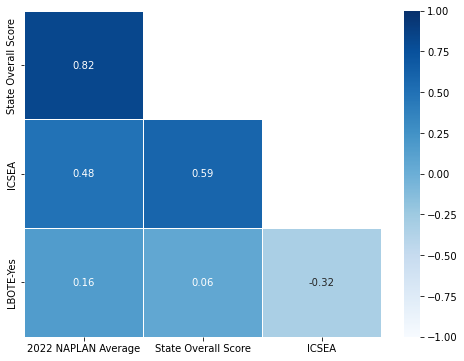

In [220]:
factors=['2022 NAPLAN Average','State Overall Score','ICSEA','LBOTE-Yes']
plt.figure(figsize=(8,6))
df_corr = df_prim[factors].corr()
ones_corr = np.ones_like(df_corr, dtype=bool)
mask = np.triu(ones_corr)
adj_mask = mask[1:,:-1]
adj_df_corr = df_corr.iloc[1:,:-1]
sns.heatmap(data=adj_df_corr, mask = adj_mask, cmap = 'Blues',vmin=-1,vmax=1, annot=True,linewidths=1,fmt='.2f')
plt.show()

Secondary schools

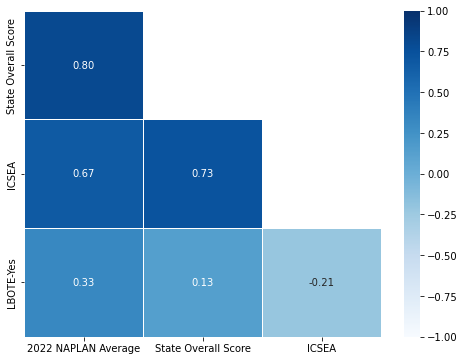

In [221]:
factors=['2022 NAPLAN Average','State Overall Score','ICSEA','LBOTE-Yes']
plt.figure(figsize=(8,6))
df_corr = df_second[factors].corr()
ones_corr = np.ones_like(df_corr, dtype=bool)
mask = np.triu(ones_corr)
adj_mask = mask[1:,:-1]
adj_df_corr = df_corr.iloc[1:,:-1]
sns.heatmap(data=adj_df_corr, mask = adj_mask, cmap = 'Blues',vmin=-1,vmax=1, annot=True,linewidths=1,fmt='.2f')
plt.show()

# 3.4 NAPLAN scores breakdown by tests

In [28]:
cols = ['2022 NAPLAN Average','Reading','Writing','Spelling','Grammar','Numeracy']

fig = make_subplots(rows=3, cols=2)

for i in range(0,3):
    for j in range(0,2):
        fig.append_trace(go.Histogram(x=df_prim[cols[i*2+j]].values.tolist(),histnorm='probability',name=cols[i*2+j]),i+1,j+1)
      
fig.update_layout(title_text='2022 NAPLAN breakdown by test - Sydney primary school',title_x=0.5)
fig.show()

In [30]:
cols = ['2022 NAPLAN Average','Reading','Writing','Spelling','Grammar','Numeracy']

fig = make_subplots(rows=3, cols=2)

for i in range(0,3):
    for j in range(0,2):
        fig.append_trace(go.Histogram(x=df_second[cols[i*2+j]].values.tolist(),histnorm='probability',name=cols[i*2+j]),i+1,j+1)
          
fig.update_layout(title_text='2022 NAPLAN breakdown by tests - Sydney secondary schools',title_x=0.5)
fig.show()

# 3.5 Comparing with country figures

In [35]:
#Filtering for Australia only
df_AUS = df_NAPLAN_country .query("STATE=='AUS' & CALENDAR_YEAR==2022 & SUBGROUP=='All' & (YEAR_LEVEL == 5 | YEAR_LEVEL==9)")\
                     [['YEAR_LEVEL','DOMAIN','STATE','MEAN']]
df_AUS.loc[df_AUS['DOMAIN']=='Grammar and Punctuation','DOMAIN']='Grammar'
df_AUS.loc[df_AUS['YEAR_LEVEL']==5,'YEAR_LEVEL']='Primary'
df_AUS.loc[df_AUS['YEAR_LEVEL']==9,'YEAR_LEVEL']='Secondary'
df_AUS['STATE']='Country'

#creating figures for Sydney
df_T = df_school.groupby(['Level'])\
                   .agg({'Reading':'mean','Writing':'mean','Spelling':'mean','Grammar':'mean','Numeracy':'mean'})
df_T = df_T.transpose().reset_index()

df_T1 = pd.DataFrame({'DOMAIN':['Reading','Writing','Spelling','Grammar','Numeracy']})
df_T1['MEAN'] = df_T['Primary']
df_T1['YEAR_LEVEL'] = 'Primary'

df_T2 = pd.DataFrame({'DOMAIN':['Reading','Writing','Spelling','Grammar','Numeracy']})
df_T2['MEAN'] = df_T['Secondary']
df_T2['YEAR_LEVEL'] = 'Secondary'

df_SYD = pd.concat([df_T1,df_T2])
df_SYD['STATE']='Sydney'

df_total = pd.concat([df_AUS, df_SYD])
df_total.rename(columns={'YEAR_LEVEL':'Level','DOMAIN':'Test','STATE':'State','MEAN':'Mean score'},inplace=True)

AUS_prim_avg=df_AUS.query("YEAR_LEVEL=='Primary'")[['MEAN']].mean().values[0]
AUS_second_avg=df_AUS.query("YEAR_LEVEL=='Secondary'")[['MEAN']].mean().values[0]
SYD_prim_avg=df_SYD.query("YEAR_LEVEL=='Primary'")[['MEAN']].mean().values[0]
SYD_second_avg=df_SYD.query("YEAR_LEVEL=='Secondary'")[['MEAN']].mean().values[0]

mdict = {'Level':['Primary','Secondary','Primary','Secondary'],
         'Test':['2022 NAPLAN Average','2022 NAPLAN Average','2022 NAPLAN Average','2022 NAPLAN Average'],
         'State':['Country','Country','Sydney','Sydney'],
         'Mean score':[AUS_prim_avg,AUS_second_avg,SYD_prim_avg,SYD_second_avg]}

df_total = pd.concat([df_total, pd.DataFrame(mdict)])
df_total.head()

,Level,Test,State,Mean score
54157,Primary,Grammar,Country,498.786406
54430,Primary,Numeracy,Country,488.294316
54703,Primary,Reading,Country,509.672814
54976,Primary,Spelling,Country,504.548046
55249,Primary,Writing,Country,484.292909


In [36]:
cols = ['2022 NAPLAN Average','Reading','Writing','Spelling','Grammar','Numeracy']
fig = make_subplots(rows=3, cols=2)

for i in range(0,3):
    for j in range(0,2):
        k = i*2+j
        df = df_total.query("Level=='Primary' & Test=='"+ cols[k]  +"'")
        chart = go.Bar(x=df['Mean score'].values.tolist(),y=df['State'].values.tolist(),orientation='h',name=cols[k])
        fig.append_trace(chart,i+1,j+1)
          
fig.update_layout(title_text='NAPLAN breakdown versus Country mean score - primary schools',title_x=0.5)
fig.show()

In [37]:
cols = ['2022 NAPLAN Average','Reading','Writing','Spelling','Grammar','Numeracy']
fig = make_subplots(rows=3, cols=2)

for i in range(0,3):
    for j in range(0,2):
        k = i*2+j
        df = df_total.query("Level=='Secondary' & Test=='"+ cols[k]  +"'")
        chart = go.Bar(x=df['Mean score'].values.tolist(),y=df['State'].values.tolist(),orientation='h',name=cols[k])
        fig.append_trace(chart,i+1,j+1)
          
fig.update_layout(title_text='NAPLAN breakdown versus Country mean score - secondary schools',title_x=0.5)
fig.show()

In [38]:
fig = px.histogram(df_total,
                   y='Test',
                   x='Mean score',
                   color='State',
                   barmode='group',facet_col='Level')
fig.update_layout(title_text='NAPLAN breakdown versus country mean score by level and test', title_x=0.5)
fig.show()

# 4. Heatmap and markers analysis

In [33]:
df_school=pd.read_csv('Sydneyschools.csv')
df_prim = df_school.query("Level=='Primary'")
df_second = df_school.query("Level=='Secondary'")

In [34]:
#Function to create Heatmap
def showHeatmap(df_tmp, criteria):
    df = df_tmp.copy()
    #map central point is sydney opera house
    mapObj = folium.Map(location=['-33.8148','151.0017'], zoom_start=10, control_scale=True)
    map_data = list(zip(df['Latitude'], df['Longitude'],df[criteria]))
    heatMap = HeatMap(data=map_data, min_opacity = 0.6, blur=20, radius=15, overlay=True)
    heatMap.add_to(mapObj)
    mapObj.save(outfile='NAPLAN.html')
    return mapObj

In [6]:
#Function to create Map with markers representing for all schools
list_color = ['green','pink','gray','beige','lightgreen','orange','darkpurple','cadetblue','blue','red','purple']

def showMarkerMap(df, f, t, level, sector, selective, opportunity):
    
    #legend for colors of the markers
    dict_color = {}
    for i in range(0, len(list_color)):
        dict_color[90+i] = list_color[i]
    print(dict_color)
    
    #initialize sql statement for filtering
    sql = "`State Overall Score` >= "+ str(f) +" & `State Overall Score` <=" + str(t) + " & Level =='"+level+"'"
    #for Government, Independent or Catholic schools
    if sector !="All":
        sql = sql + " & `School Sector`=='" +sector+"'"   
    #selective schools (for secondary only)
    if (selective=='Y') & (level=='Secondary'):
            sql = sql + " & `Selective status`!='No Selective'" 
    #opportunity class (for primary only)
    if (opportunity=='Y') & (level=='Primary'):
            sql = sql + " & Opportunity_class=='Y'"
   
    df = df.query(sql)
     
    #number of schools
    print('Number of schools:',df['School'].count())
    
    #initialize a map with the centre is the position of Sydney Opera house
    mymap = folium.Map(location  = ['-33.8568','151.2153'], zoom_start = 10, control_scale = True,icon=folium.Icon(color='red',icon='university', prefix='fa') )
    
    #iterating each school and plot in a map
    for i, row in df.iterrows():
        folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup = row['School']+'-State Overall Score: '+str(row['State Overall Score'])+'-2022 NAPLAN Avg: '+str(row['2022 NAPLAN Average']),
                  icon=folium.Icon(color=dict_color[row['State Overall Score']])).add_to(mymap)
    
    return mymap

In [7]:
showMarkerMap(df_school,90,100,"Primary","All","","")

{90: 'green', 91: 'pink', 92: 'gray', 93: 'beige', 94: 'lightgreen', 95: 'orange', 96: 'darkpurple', 97: 'cadetblue', 98: 'blue', 99: 'red', 100: 'purple'}
Number of schools: 480


TypeError: Object of type Icon is not JSON serializable

# 4.1 Heatmap of primary school

In [35]:
#Density measured by State Overal Score
showHeatmap(df_prim,'State Overall Score')

In [96]:
#Density measured by 2022 NAPLAN Average
showHeatmap(df_prim,'2022 NAPLAN Average')

In [115]:
##Density measured by ICSEA
showHeatmap(df_prim,'ICSEA')

# 4.2 Heatmap of secondary schools

In [122]:
#Density measured by State Overal Score
showHeatmap(df_second,'State Overall Score')

In [97]:
#Density measured by 2022 NAPLAN Average
showHeatmap(df_second,'2022 NAPLAN Average')

In [124]:
#Density measured by ICSEA
showHeatmap(df_second,'ICSEA')

# 4.3 Marker maps

# 4.3.1 Primary schools

In [142]:
#State Overall Score ranges from 95 to 100
showMarkerMap(df_prim, 96, 100)

{90: 'green', 91: 'pink', 92: 'gray', 93: 'beige', 94: 'lightgreen', 95: 'orange', 96: 'darkpurple', 97: 'cadetblue', 98: 'blue', 99: 'red', 100: 'purple'}
Number of schools: 249


# 4.3.2 Secondary schools

In [143]:
#State Overall Score ranges from 95 to 100
showMarkerMap(df_second, 95, 100)

{90: 'green', 91: 'pink', 92: 'gray', 93: 'beige', 94: 'lightgreen', 95: 'orange', 96: 'darkpurple', 97: 'cadetblue', 98: 'blue', 99: 'red', 100: 'purple'}
Number of schools: 116
